In [1]:
import numpy as np
import scipy
import plotly.express as px
import pandas as pd
import endaq
import matplotlib.pyplot as plt

In [2]:
#Paramètres du choc
duree=1
fe=400000
fc=30000
nbr_chocs=1
lambdaa=10

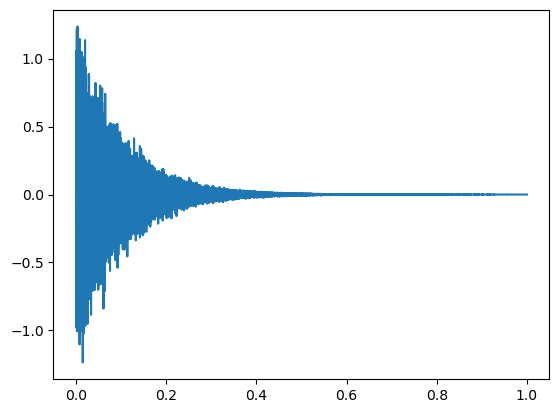

In [ ]:
#Création des chocs
t=np.linspace(0,duree,duree*fe)
expo=1*np.exp(-lambdaa*t)
b, a = scipy.signal.butter(8, fc/(fe/2))
chocs=[]
for i in range(nbr_chocs):
    random=np.random.normal(loc=0, scale=1, size=duree*fe)
    y=random*expo
    y[0]=0
    y = scipy.signal.filtfilt(b, a, y, padlen=150)
    chocs.append(y)
    plt.plot(t,chocs[i])
plt.show()

In [ ]:
#Decimation
choc_decim=[]
t_decim = []
choc_resample=[]
for i in range(nbr_chocs):
    choc_decim.append(scipy.signal.decimate(chocs, (i+1)))
    t_decim.append(np.linspace(0, duree, len(choc_decim[i]), endpoint=False))
    choc_resample.append(scipy.signal.resample(choc_decim[i],len(t)))
    plt.plot(t_decim[i],choc_decim[i])
plt.show()

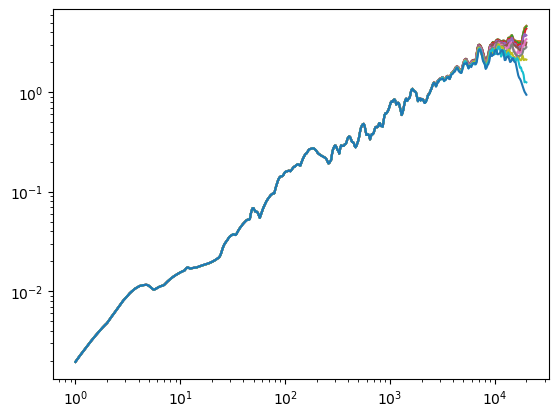

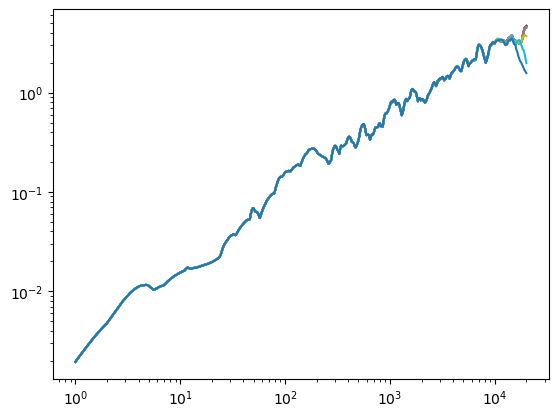

In [ ]:
src=[]
freqs = np.logspace(start=np.log10(1),stop=np.log10(20000), num=500, endpoint=True, base=10)
for q in range(11):
    src.append(endaq.calc.shock.shock_spectrum(pd.DataFrame(choc_decim[q],t_decim[q]), freqs=freqs, damp=0.05, mode='srs'))
    plt.loglog(freqs,src[q-1])
plt.show()

src=[]
freqs = np.logspace(start=np.log10(1),stop=np.log10(20000), num=500, endpoint=True, base=10)
for q in range(11):
    src.append(endaq.calc.shock.shock_spectrum(pd.DataFrame(choc_resample[q],t), freqs=freqs, damp=0.05, mode='srs'))
    plt.loglog(freqs,src[q-1])
plt.show()

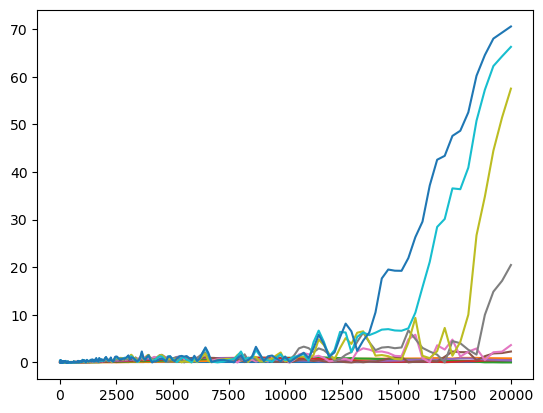

<function matplotlib.pyplot.show(close=None, block=None)>

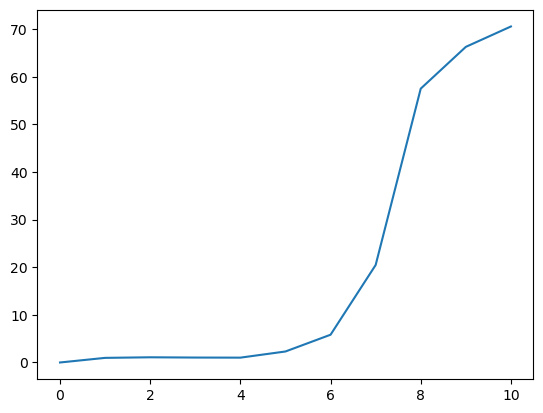

In [ ]:
diff=[]
max_diff=[]
for q in range(11):
    diff.append(100*np.abs((src[0]-src[q])/src[0]))
    max_diff.append(np.max(100*np.abs((src[0]-src[q])/src[0])))
    plt.plot(freqs,diff[q])
plt.show()

plt.plot(max_diff)
plt.show